In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from pygeotools.lib import geolib, iolib
from imview.lib import pltlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import cartopy.crs as ccrs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
#generate count maps for each gpkg
fn_list = glob.glob("*count.tif")
fn_list.sort()

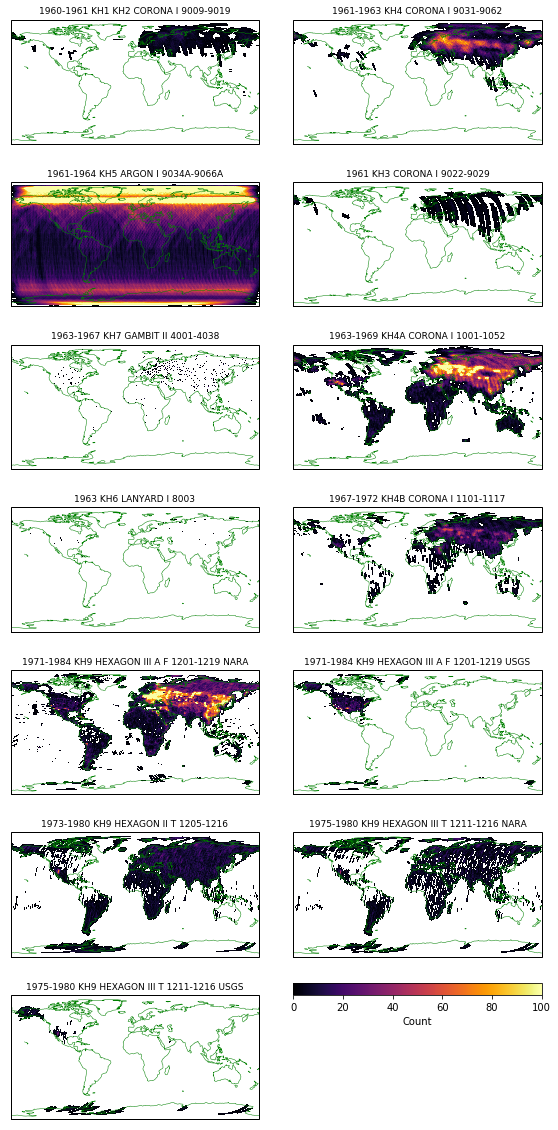

In [44]:
proj=ccrs.PlateCarree()
f, axa = plt.subplots(int(np.ceil(len(fn_list)/2)), 2, figsize=(8,16), sharex=True, sharey=True, subplot_kw=dict(projection=proj))
for ax in axa.ravel():
    pltlib.hide_ticks(ax)

for n,fn in enumerate(fn_list):
    ax = axa.ravel()[n]
    ax.set_title(fn.split('_count')[0].replace('_', ' '), {'size':9})
    a, ds = iolib.fn_getma(fn, return_ds=True)
    extent = geolib.ds_extent(ds)
    extent = [extent[0], extent[2], extent[1], extent[3]]
    im = ax.imshow(a, cmap='inferno', clim=(0,100), origin='upper', extent=extent)
    ax.coastlines(color='green', lw=0.5)

cbar = f.colorbar(im, ax=axa[-1,-1], orientation='horizontal', label='Count', fraction=1.0)
f.delaxes(axa[-1,-1])
plt.tight_layout()

In [40]:
out_fn = 'declass_count_plot.png'
f.savefig(out_fn, dpi=300)